### Задание №1: Загрузите и осмотрите данные.
Данные - результаты марафонов, проводимых в Москве, в разные года.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import warnings

#import sklearn
#import tensorflow as tf

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Данные находятся в нескольких файлах, которые нужно собрать в один датафрейм. Также, в названиях файлов содержится важная информация, которую нужно будет внести в датафрейм. Воспользуемся regex'ом для поиска файлов и извлечению нужной информации.  
Внизу названия всех файлов с данными.

In [ ]:
data_files = [re.search(r'mm_results_(\d+)km_(\d+).xlsx', file) for file in os.listdir(path) if re.search(r'mm_results_(\d+)km_(\d+).xlsx', file)]
data_files

[<re.Match object; span=(0, 25), match='mm_results_10km_2018.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_10km_2019.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_10km_2020.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_10km_2022.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_10km_2023.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_42km_2018.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_42km_2019.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_42km_2020.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_42km_2022.xlsx'>,
 <re.Match object; span=(0, 25), match='mm_results_42km_2023.xlsx'>]

In [ ]:
df = pd.DataFrame()

for fle in data_files:
  curr_df = pd.read_excel(os.path.join(path, fle.group()))
  curr_df['distance'] = fle.group(1)
  curr_df['year'] = fle.group(2)
  df = pd.concat([df, curr_df], axis=0)


df.head(-5)

,name,country,email,birth_place,reg_date,number,place,pace,result,distance,year
0,Гандалипов Павел,"Россия, М32",jgarcia@hotmail.com,г. Москва,2018-06-28,29210,431,4:13,0:42:06,10,2018
1,Земляной Андрей,"Россия, М29",gostomisljakushev@yandex.ru,Кемеровская обл.,2018-06-13,30497,432,4:13,0:42:10,10,2018
2,Albridzio Pavel,"Россия, М36",damian95@outlook.com,Московская обл.,2018-03-03,19225,433,4:13,0:42:10,10,2018
3,Sandyuk Anna,"Россия, Ж29",dboyle@outlook.com,респ. Башкортостан,2018-02-01,26928,434,4:14,0:42:11,10,2018
4,Власов Николай,"Россия, М29",karenwhite@hotmail.com,Челябинская обл.,2018-03-06,19930,435,4:14,0:42:12,10,2018
...,...,...,...,...,...,...,...,...,...,...,...
12899,Kryukova Margarita,"Россия, Ж38",albert55@yahoo.com,Самарская обл.,2023-06-25,15097,-,-,DNF,42,2023
12900,Шаяхметов Глеб,"Россия, М23",elizabeth50@yahoo.com,г. Москва,2023-05-16,15106,-,-,DNF,42,2023
12901,Викулин Максим,"Россия, М32",debra25@hotmail.co.uk,респ. Адыгея,2023-05-06,15146,-,-,DNF,42,2023
12902,Moskina Marina,"Россия, Ж39",larsonjoseph@hotmail.com,Самарская обл.,2023-08-28,15176,-,-,DNF,42,2023


Описание некоторых переменных:
* place - место, занятое в марафоне
* pace - среднее время, за которое участник пробегает километр
* result - общее время. Имеет значения DNF (did not finish), DQ (disqualified)
* distance - Московские марафоны проводятся в двух форматах - 10 и 42 км
* year - год проведения марафона

In [ ]:
df = df.replace(['-', '                      -                  '], np.nan)
df['distance'] = df['distance'].astype('int')

df['place'] = pd.to_numeric(df['place'])
df.loc[df['place'] > 50000, 'place'] = np.nan

df['finished'] = 1
df.loc[df['result'] == 'DNF', 'finished'] = 0
df.loc[df['result'] == 'DNF', 'result'] = np.nan

df['disqualified'] = 0
df.loc[df['result'] == 'DQ', 'disqualified'] = 1
df.loc[df['result'] == 'DQ', 'result'] = np.nan

df['valid'] = (df['finished'] & (df['disqualified'] == 0)).astype('int')

df[['country', 'gender age']] = df['country'].str.split(', ', expand=True)
df['gender'] = df['gender age'].str[0]
df['age'] = df['gender age'].str[1:]
df = df.drop('gender age', axis=1)

df['pace'] = (pd.to_datetime(df['pace'], format='%M:%S') - pd.to_datetime('1900-01-01')).dt.total_seconds()
df['result'] = pd.to_timedelta(df['result']).dt.total_seconds()

df['age'] = pd.to_numeric(df['age'])

df.head(-5)

,name,country,email,birth_place,reg_date,number,place,pace,result,distance,year,finished,disqualified,valid,gender,age
0,Гандалипов Павел,Россия,jgarcia@hotmail.com,г. Москва,2018-06-28,29210,431.00,253.00,"2,526.00",10,2018,1,0,1,М,32
1,Земляной Андрей,Россия,gostomisljakushev@yandex.ru,Кемеровская обл.,2018-06-13,30497,432.00,253.00,"2,530.00",10,2018,1,0,1,М,29
2,Albridzio Pavel,Россия,damian95@outlook.com,Московская обл.,2018-03-03,19225,433.00,253.00,"2,530.00",10,2018,1,0,1,М,36
3,Sandyuk Anna,Россия,dboyle@outlook.com,респ. Башкортостан,2018-02-01,26928,434.00,254.00,"2,531.00",10,2018,1,0,1,Ж,29
4,Власов Николай,Россия,karenwhite@hotmail.com,Челябинская обл.,2018-03-06,19930,435.00,254.00,"2,532.00",10,2018,1,0,1,М,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,Kryukova Margarita,Россия,albert55@yahoo.com,Самарская обл.,2023-06-25,15097,NaN,NaN,NaN,42,2023,0,0,0,Ж,38
12900,Шаяхметов Глеб,Россия,elizabeth50@yahoo.com,г. Москва,2023-05-16,15106,NaN,NaN,NaN,42,2023,0,0,0,М,23
12901,Викулин Максим,Россия,debra25@hotmail.co.uk,респ. Адыгея,2023-05-06,15146,NaN,NaN,NaN,42,2023,0,0,0,М,32
12902,Moskina Marina,Россия,larsonjoseph@hotmail.com,Самарская обл.,2023-08-28,15176,NaN,NaN,NaN,42,2023,0,0,0,Ж,39


In [ ]:
df.isna().sum()

name               0
country            0
email              0
birth_place     4837
reg_date           0
number             0
place           3539
pace            3327
result          3327
distance           0
year               0
finished           0
disqualified       0
valid              0
gender             0
age                0
dtype: int64

В `birth_place` есть пропущенные значения, заменим их вероятностно. Пропуски по остальным категориям не нужно заменять, так как они являются следствием, например, дисквалификации.

In [ ]:
def probs_replace(srs, values):
  '''
  Returns a copy of series where target values (e.g. '-', np.nan) are probabilistically replaced with other values. Use on categorical data
  '''
  if not hasattr(values, '__iter__') or isinstance(values, str):
    values = [values]

  map_series = srs.value_counts().drop(index=values)
  map_series = map_series / map_series.sum()

  srs = srs.copy(deep=True)
  srs[srs.isin(values)] = np.random.choice(map_series.index, size = (srs.isin(values)).sum(), p = map_series.values)
  return srs


df['birth_place'] = probs_replace(df['birth_place'].fillna('-'), '-')

In [ ]:
df.head(-5)

,name,country,email,birth_place,reg_date,number,place,pace,result,distance,year,finished,disqualified,valid,gender,age
0,Гандалипов Павел,Россия,jgarcia@hotmail.com,г. Москва,2018-06-28,29210,431.00,253.00,"2,526.00",10,2018,1,0,1,М,32
1,Земляной Андрей,Россия,gostomisljakushev@yandex.ru,Кемеровская обл.,2018-06-13,30497,432.00,253.00,"2,530.00",10,2018,1,0,1,М,29
2,Albridzio Pavel,Россия,damian95@outlook.com,Московская обл.,2018-03-03,19225,433.00,253.00,"2,530.00",10,2018,1,0,1,М,36
3,Sandyuk Anna,Россия,dboyle@outlook.com,респ. Башкортостан,2018-02-01,26928,434.00,254.00,"2,531.00",10,2018,1,0,1,Ж,29
4,Власов Николай,Россия,karenwhite@hotmail.com,Челябинская обл.,2018-03-06,19930,435.00,254.00,"2,532.00",10,2018,1,0,1,М,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,Kryukova Margarita,Россия,albert55@yahoo.com,Самарская обл.,2023-06-25,15097,NaN,NaN,NaN,42,2023,0,0,0,Ж,38
12900,Шаяхметов Глеб,Россия,elizabeth50@yahoo.com,г. Москва,2023-05-16,15106,NaN,NaN,NaN,42,2023,0,0,0,М,23
12901,Викулин Максим,Россия,debra25@hotmail.co.uk,респ. Адыгея,2023-05-06,15146,NaN,NaN,NaN,42,2023,0,0,0,М,32
12902,Moskina Marina,Россия,larsonjoseph@hotmail.com,Самарская обл.,2023-08-28,15176,NaN,NaN,NaN,42,2023,0,0,0,Ж,39


In [ ]:
df.dtypes

name                    object
country                 object
email                   object
birth_place             object
reg_date        datetime64[ns]
number                   int64
place                  float64
pace                   float64
result                 float64
distance                 int64
year                    object
finished                 int64
disqualified             int64
valid                    int64
gender                  object
age                      int64
dtype: object

### Задание №2: Погрузитесь в данные и ответьте на вопросы:
1) Растет ли популярность Московского марафона?  
2) Кого из участников больше: мужчин или женщин (за все периоды)? Отобразите информацию с помощью pie chart  
3) Какая дистанция является более популярной у участников соревнования за все периоды?

<Axes: xlabel='year'>

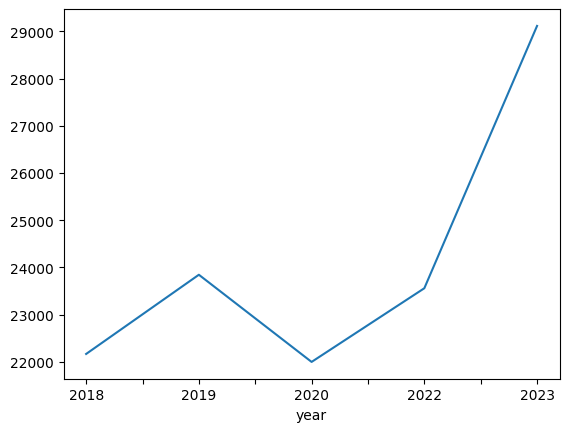

In [ ]:
df.groupby('year').size().plot()

Популярность Московского марафона в общем растет. Посмотрим на популярность разных дистанций.

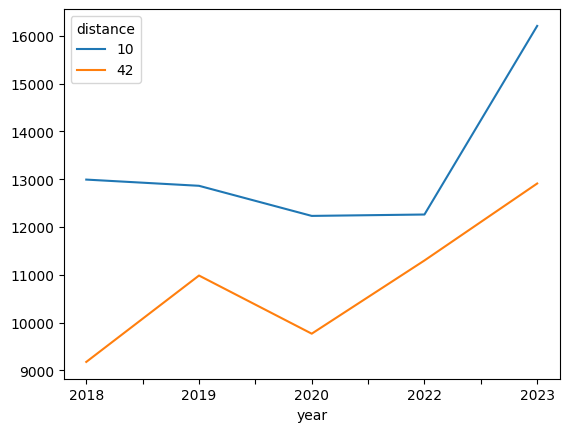

In [ ]:
df.groupby(['year', 'distance']).size().unstack(level=1).plot();

Популярность обоих дистанций тоже растет. Ниже pie chart участников по полу.

<Axes: >

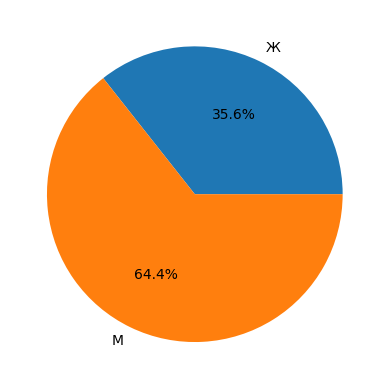

In [ ]:
df.groupby('gender').size().plot(kind='pie', autopct='%1.1f%%')

Итак, мужчин около 2/3. Посмотрим на популярность дистанций за все периоды.

<Axes: xlabel='distance'>

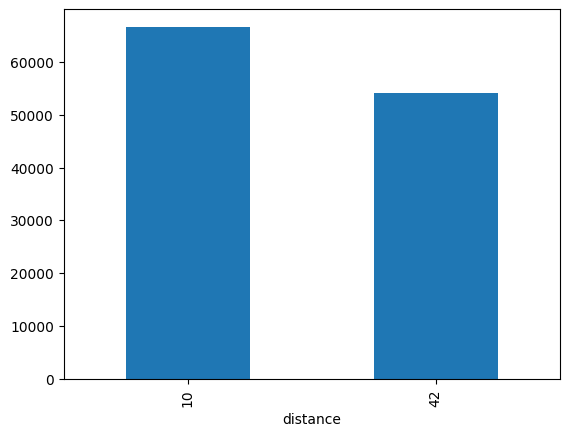

In [ ]:
df.groupby('distance').size().plot(kind='bar')

Как мы и ранее видели, дистанция в 10 км более популярна. Интересно посмотреть на соотношение популярности дистанций в разные года.

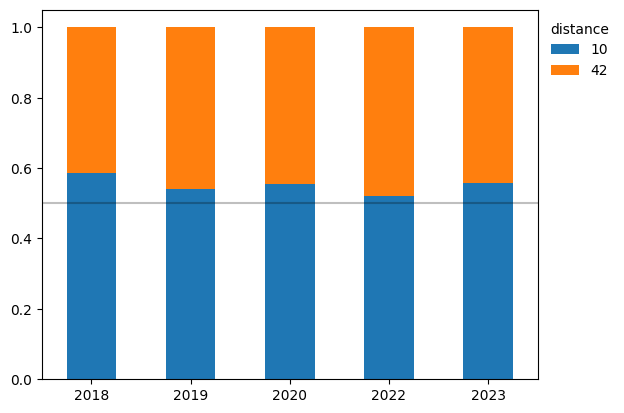

In [ ]:
out = pd.pivot_table(df, index='year', columns='distance', values='name', aggfunc='count')
out.div(out.sum(axis=1), axis=0).plot(kind='bar', stacked=True, rot=0, xlabel='')
plt.axhline(.5, color='black', alpha=.25)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', title='distance', frameon=False);

Итак, дистанция в 10 км была популярнее во все периоды, хотя в 2022 доли почти сравнялись.

### Задание №3: Погрузитесь в данные и ответьте на вопросы:
1. Граждане каких стран (кроме России) чаще всего принимают участие в соревновании (за всё время)? Какая доля участников из зарубежных стран?
2. Какая доля участников, которые не добираются до финиша? Как изменялась этот показатель в зависимости от дистанции и года проведения соревнований?
3. Определите средний темп для мужчин и женщин для двух видов дистанций, выбрав только финишировавших участников.



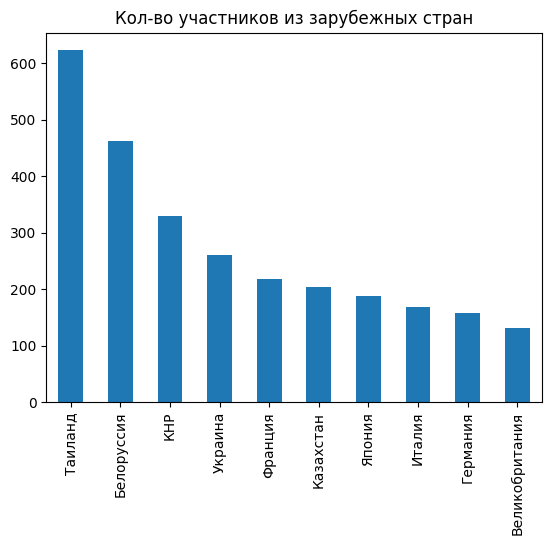

In [ ]:
df.groupby('country').size().sort_values(ascending=False)[1:11].plot(kind='bar', xlabel='')
plt.title('Кол-во участников из зарубежных стран');

In [ ]:
#доля участников из зарубежных стран
v = 1 - (df['country'] == 'Россия').mean()
f'{v:.2%}'

'4.04%'

Итак, 4% участников из зарубежных стран. Посмотрим на долю участников из России по годам.

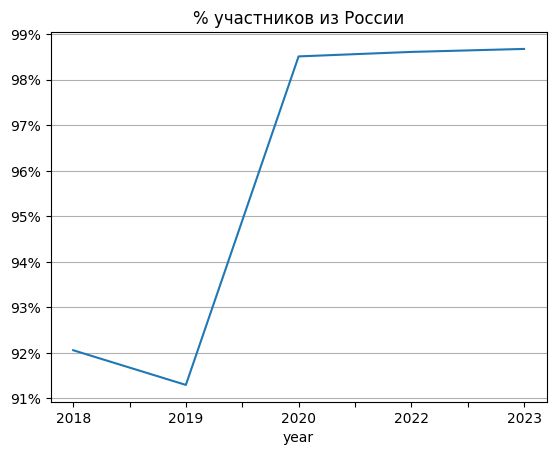

In [ ]:
out = df.groupby(['year', df['country'] == 'Россия']).size().unstack(level=1).rename({True : 'Россия', False : 'другое'}, axis=1)

ax = (out['Россия'] / (out['Россия'] + out['другое'])).plot()
ax.yaxis.set_major_formatter('{x:.0%}')
ax.grid(axis='y')
plt.title('% участников из России');

In [ ]:
#доля участников, которые не добираются до финиша
v = (1 - df['finished']).mean()
f'{v:.2%}'

'0.91%'

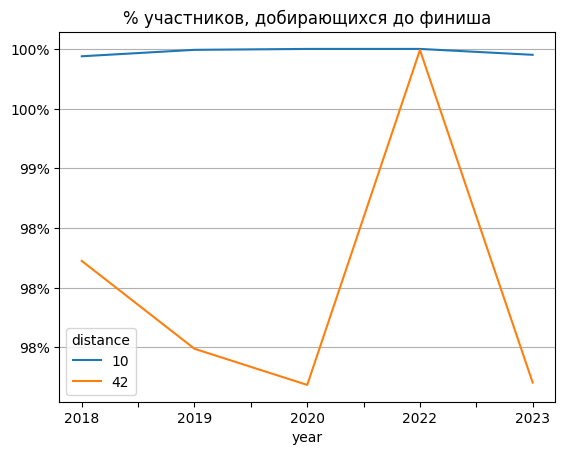

In [ ]:
ax = pd.pivot_table(df, index='year', columns='distance', values='finished', aggfunc='mean').plot()
ax.yaxis.set_major_formatter('{x:.0%}')
ax.grid(axis='y')
plt.title('% участников, добирающихся до финиша');

In [ ]:
#средний темп
df[df['finished'] == 1].groupby('gender')['pace'].mean()

gender
Ж   378.60
М   339.08
Name: pace, dtype: float64

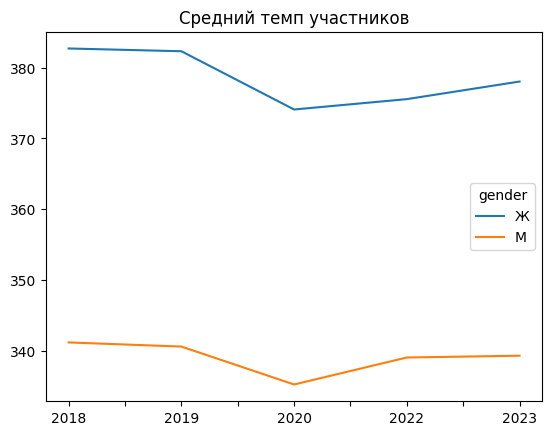

In [ ]:
pd.pivot_table(df[df['finished'] == 1], index='year', columns='gender', values='pace', aggfunc='mean').plot(xlabel='')
plt.title('Средний темп участников');

### Задание №4: Рассмотрим детальнее отдельных участников соревнований и ответим на следующие вопросы:
    
1. Топ самых популярных мужских и женских имен среди участников?
2. Назовите самого возрастного участника среди мужчин и женщин, которые впервые принимают участия в соревновании?
3. Какие есть закономерности в дате регистрации участников? Регистрируются ли призеры раньше/позже большинства участников?

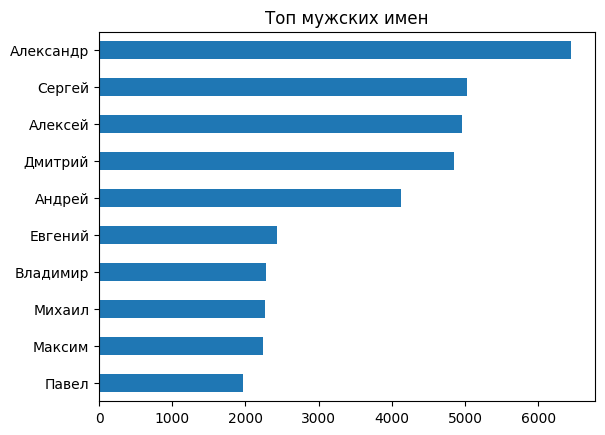

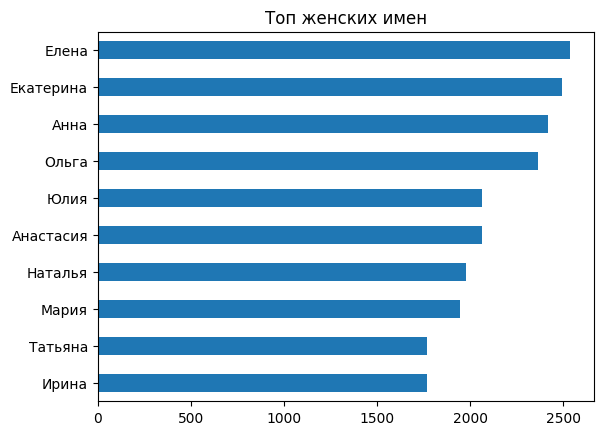

In [ ]:
for gender in df['gender'].unique():
  df.loc[df['gender'] == gender, 'name'].str.split().str[1].value_counts()[:10].sort_values().plot(kind='barh')
  _gender = 'женских' if gender == 'Ж' else 'мужских'
  plt.title(f'Топ {_gender} имен')
  plt.show()

In [ ]:
#чтобы ответить на вопрос о возрастных участниказ
#создадим новый датасет впервые участвуюших людей
out = pd.merge(df[['name', 'gender', 'age', 'year']], df.groupby('name')['year'].min().to_frame().reset_index(), on=['name', 'year'])
out.head()

,name,gender,age,year
0,Гандалипов Павел,М,32,2018
1,Земляной Андрей,М,29,2018
2,Albridzio Pavel,М,36,2018
3,Sandyuk Anna,Ж,29,2018
4,Власов Николай,М,29,2018


In [ ]:
#получаем максимальный возраст для каждого гендера
#применение idxmax было бы некорректно, так как он вывел бы только 2 результата из 3
out.groupby('gender')['age'].max()

gender
Ж    78
М    85
Name: age, dtype: int64

In [ ]:
#смотрим кто такого возраста
#это и есть ответ на 2ой вопрос
out[((out['gender'] == 'М') & (out['age'] >= 85)) | ((out['gender'] == 'Ж') & (out['age'] >= 78))]

,name,gender,age,year
11533,Рожкова Нина,Ж,78,2018
12470,Лыжов Иван,М,85,2018
21136,Шилина Валентина,Ж,78,2019


Предположим, что призовое место - до 10.

In [ ]:
df.groupby(df['place'] < 11)['reg_date'].mean()

place
False   2020-11-24 16:08:47.127822592
True    2020-10-03 14:09:36.000000000
Name: reg_date, dtype: datetime64[ns]

Итак, призеры в среднем регистрируются на месяц раньше. Однако эта табличка не учитывает, что соревнования проходят в разные года, поэтому я переведу все в дни.

In [ ]:
pd.concat([df['reg_date'].dt.month * 30 + df['reg_date'].dt.day, df['place']], axis=1)

,reg_date,place
0,208,431.00
1,193,432.00
2,93,433.00
3,61,434.00
4,96,435.00
...,...,...
12904,245,NaN
12905,35,NaN
12906,130,NaN
12907,125,NaN


<Axes: xlabel='reg_date', ylabel='place'>

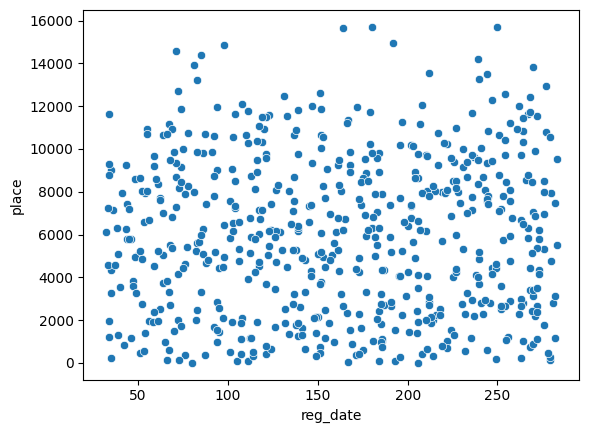

In [ ]:
out = df.loc[~df['place'].isna(), ['reg_date', 'place']]
out['reg_date'] = out['reg_date'].dt.month * 30 + out['reg_date'].dt.day

sns.scatterplot(out.iloc[::200], x='reg_date', y='place')

Scatter plot не говорит о наличии какой-либо зависимости. На всякий случай, проверим корреляцию.

In [ ]:
out.corr()

,reg_date,place
reg_date,1.00,0.00
place,0.00,1.00


Итак, зависимости в регистрациях точно нет. Результат, который мы получили в самом начале, скорее всего - результат шума, так как призеров мало - около 50.

### Задание №5: Рассмотрим детальнее отдельных участников соревнований и ответим на следующие вопросы:
    
1. На какой возраст приходится пик участния в соревновании на каждой из дистанций?
2. Какие почтовые сервисы самые популярные у участников? Определите доли топ-5 сервисов и визуализируйте данные с помощью pie chart
3. Есть ли участники, которые стартовали более 2 раз и во всех случаях не финишировали?

Ниже табличка с кол-вом участников определенного возраста (#) и этим самым возрастом, на который приходится пик соревнования (age).

In [ ]:
out = df.groupby(['distance', 'age']).size().unstack(level=0)
pd.DataFrame([out.max(), out.idxmax()], index=['#', 'age']).T

,#,age
distance,,
10,"3,592.00",32.00
42,"3,001.00",35.00


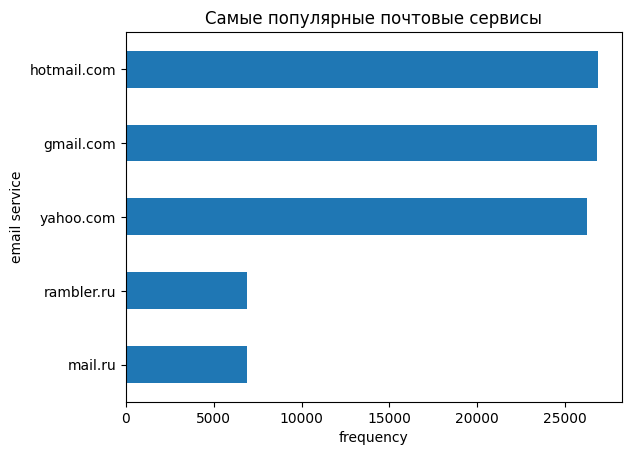

In [ ]:
out = df.groupby(df['email'].str.split('@').str[1]).size().sort_values()
out[-5:].plot(kind='barh', ylabel='email service', xlabel='frequency')
plt.title('Самые популярные почтовые сервисы');

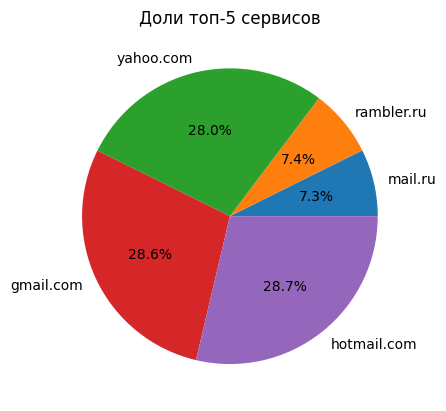

In [ ]:
out[-5:].plot(kind='pie', autopct='%1.1f%%')
plt.title('Доли топ-5 сервисов');

In [ ]:
#таблица участников, которые стартовали более 2 или более раз и во всех случаях не финишировали
out = df.groupby('name').agg({'name' : 'size', 'finished' : 'sum'})
out[(out['finished'] == 0) & (out['name'] > 1)]

,name,finished
name,,
Doege Ulrike,2,0
Вахтин Антон,2,0
Мальцев Константин,2,0
Музафарова Людмила,3,0
Мусина Лейсан,2,0
Пивоваров Владислав,3,0
Шумаков Андрей,2,0


### Задание №6: Проанализируйте возрастной состав участников, разбив их на 3 группы:
- участники до 35 лет;
- участники от 35 до 60 лет;
- участники старше 60 лет.
Ответьте на вопросы, подкрепив выводы визуализацией данных.
    
1. Как менялась численность данных групп за годы проведения соревнований? Визуализируйте данные
2. Как менялся средний результат финишировавших участников в разрезе групп за годы проведения соревнований?
3. Проанализируйте распределение результатов финишировавших участников в разрезе возрастных групп и пола. Сделайте не менее 3 выводов, подкрепив их визуализацией данных.


In [ ]:
df['age_bin'] = pd.cut(df['age'], [df['age'].min() - 1, 35, 60, df['age'].max()])

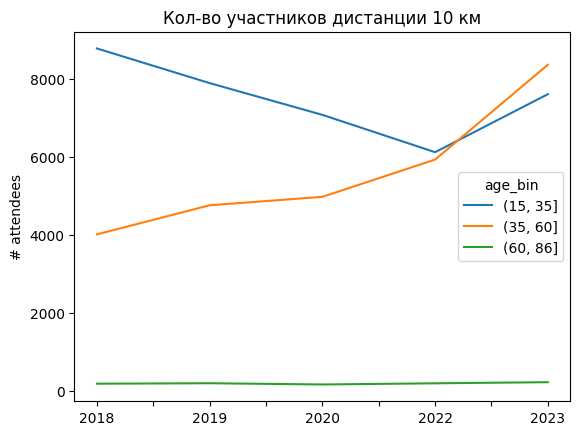

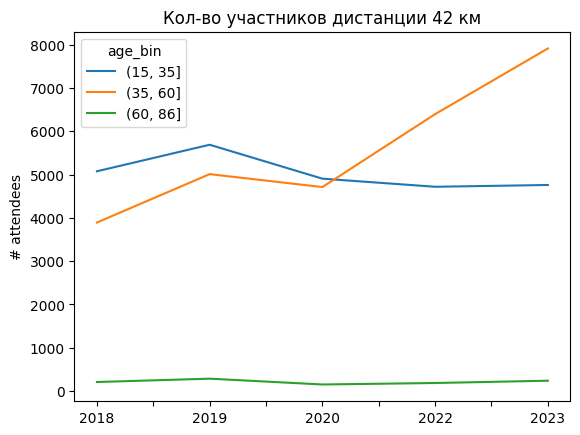

In [ ]:
for unique in df['distance'].unique():
  df[df['distance'] == unique].groupby(['year', 'age_bin']).size().unstack(level=1).plot(xlabel='',
    ylabel='# attendees', title=f'Кол-во участников дистанции {unique} км')

<Axes: title={'center': 'Средний результат участников'}, xlabel='year'>

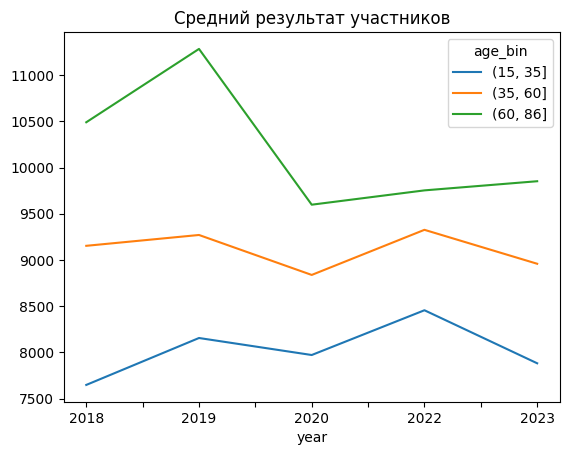

In [ ]:
df.groupby(['year', 'age_bin'])['result'].mean().unstack(1).plot(title='Средний результат участников')

Техническое пояснение к ячейке ниже:  
Если при вызове `df.plot()` дать аргумент `legend=False`, то легенда не будет построена ни на одном из сабграфов. Однако, мы не сможем получить обьект легенды, чтобы потом его построить на фигуре.  
Так, я каждый раз вызываю легенду (`legend=True` по умолчанию), чтобы отдельно получить ее, а потом каждый раз удаляю легенду у самого сабграфика, чтобы она не появлялась 4 раза.

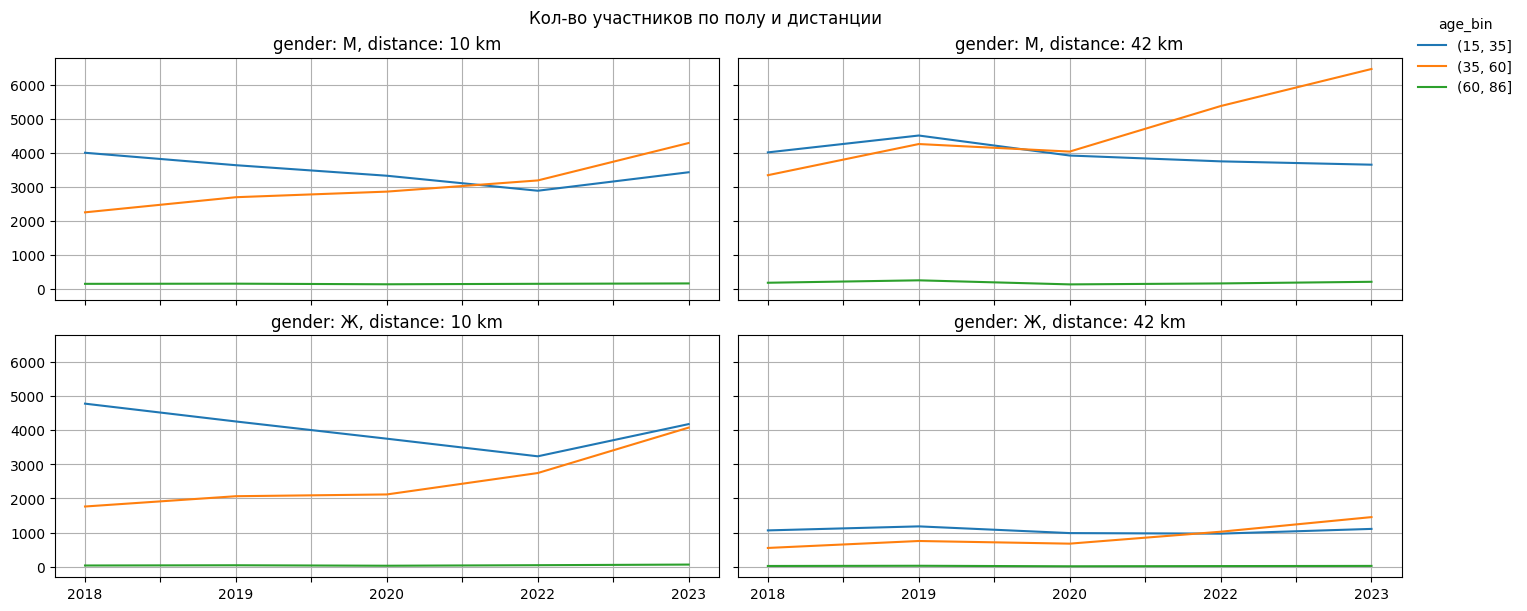

In [ ]:
out = df.groupby(['gender', 'distance', 'year', 'age_bin']).size().unstack(level=[0,1,3])

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(14, 6), layout="constrained")

for row, gender in enumerate(df['gender'].unique()):
  for column, distance in enumerate(df['distance'].unique()):
    ax = axs[row, column]
    out[gender][distance].plot(ax=ax, xlabel='', title=f'gender: {gender}, distance: {distance} km')
    ax.grid()
    if row == 0 and column == 0:
      handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()


fig.legend(handles, labels, bbox_to_anchor=(1,1), loc='upper left', frameon=False, title='age_bin')
plt.suptitle('Кол-во участников по полу и дистанции');

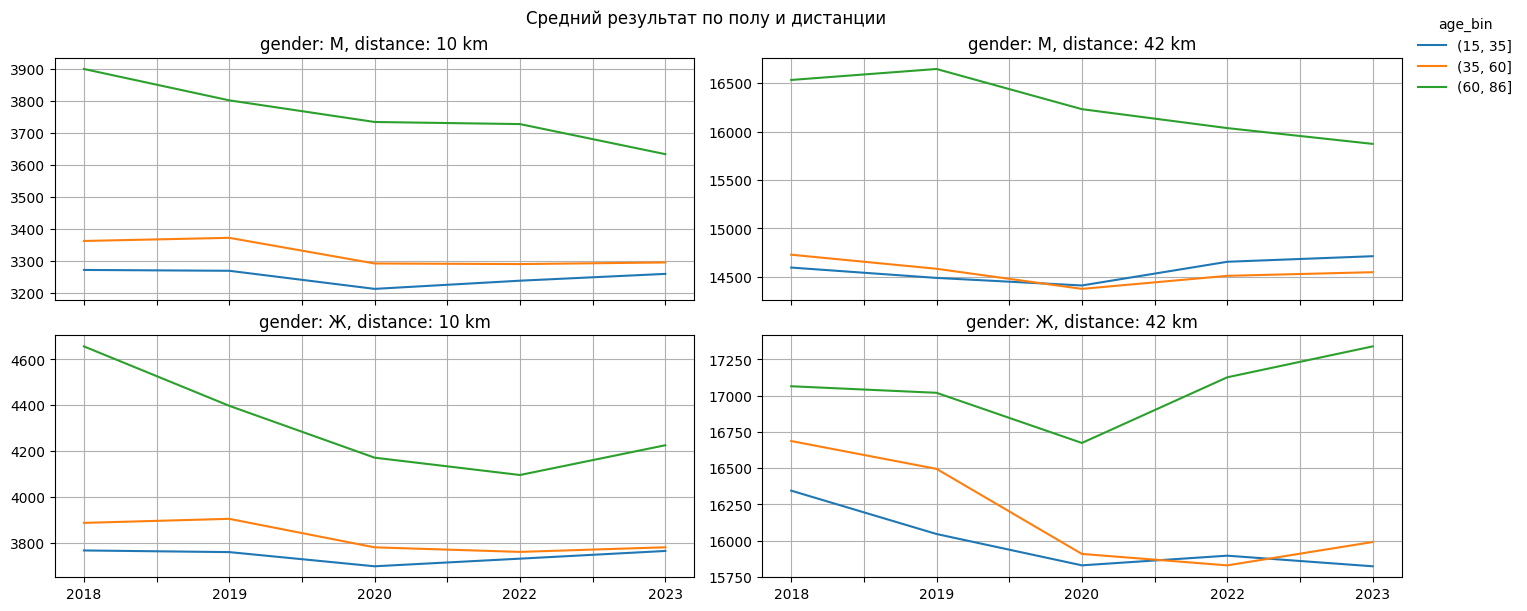

In [ ]:
out = df.groupby(['gender', 'distance', 'year', 'age_bin'])['result'].mean().unstack(level=[0,1,3])

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14, 6), layout="constrained")

for row, gender in enumerate(df['gender'].unique()):
  for column, distance in enumerate(df['distance'].unique()):
    ax = axs[row, column]
    out[gender][distance].plot(ax=ax, xlabel='', title=f'gender: {gender}, distance: {distance} km')
    ax.grid()
    if row == 0 and column == 0:
      handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()


fig.legend(handles, labels, bbox_to_anchor=(1,1), loc='upper left', frameon=False, title='age_bin')
plt.suptitle('Средний результат по полу и дистанции');

Выводы:
* Из очевидных - у мужчин или молодых результаты лучше
* У мужчин от 60 лет результаты улучшаются со временем
* У мужчин до 60 лет на дистанции 10 км результаты несущественно улучшаются, а на дистанции 42 км - чуть ухудшаются
* У женщин от 60 лет результаты улучшались до 22 или 23 года
* У женщин до 60 лет результаты остаются на одном уровне в 20-23 гг

### Задание №7:
1. Регистрация на соревнование начинается за 9 месяцев до старта. Проанализируйте распределение дат регистрации, определите аномалии в датах регистрации. Сделайте не менее 3 выводов
2. В период пандемии многие участники не могли полноценно тренироваться. Проаналируйте темп участников выделенных групп в привязке к году проведения Московского марафона, подтвердите/опровергните гипотезу.


Сначала узнаем, когда точно начинается и заканчивается регистрация.

In [ ]:
for year in df['year'].unique():
  print(df.loc[df['year'] == year, 'reg_date'].agg(['min', 'max']))

min   2018-01-01
max   2018-09-13
Name: reg_date, dtype: datetime64[ns]
min   2019-01-01
max   2019-09-13
Name: reg_date, dtype: datetime64[ns]
min   2020-01-01
max   2020-09-12
Name: reg_date, dtype: datetime64[ns]
min   2022-01-01
max   2022-09-13
Name: reg_date, dtype: datetime64[ns]
min   2023-01-01
max   2023-09-13
Name: reg_date, dtype: datetime64[ns]


Будем считать для удобства, что регистрация на большинство соревнований начинается 1 января и заканчивается 13 сентября.

In [ ]:
pd.to_datetime('2018-09-13') - pd.to_datetime('2018-01-01')

Timedelta('255 days 00:00:00')

Значение выше понадобится нам далее.  
Ниже расчет количества дней, прошедших с начала открытия регистрации.

In [ ]:
for year in df['year'].unique():
   df.loc[df['year'] == year, 'reg_delta'] = df.loc[df['year'] == year, 'reg_date'].max() - df.loc[df['year'] == year, 'reg_date']

df['reg_delta'] = df['reg_delta'].dt.days
df.head(-5)

,name,country,email,birth_place,reg_date,number,place,pace,result,distance,year,finished,disqualified,valid,gender,age,age_bin,reg_delta
0,Гандалипов Павел,Россия,jgarcia@hotmail.com,г. Москва,2018-06-28,29210,431.00,253.00,"2,526.00",10,2018,1,0,1,М,32,"(15, 35]",77
1,Земляной Андрей,Россия,gostomisljakushev@yandex.ru,Кемеровская обл.,2018-06-13,30497,432.00,253.00,"2,530.00",10,2018,1,0,1,М,29,"(15, 35]",92
2,Albridzio Pavel,Россия,damian95@outlook.com,Московская обл.,2018-03-03,19225,433.00,253.00,"2,530.00",10,2018,1,0,1,М,36,"(35, 60]",194
3,Sandyuk Anna,Россия,dboyle@outlook.com,респ. Башкортостан,2018-02-01,26928,434.00,254.00,"2,531.00",10,2018,1,0,1,Ж,29,"(15, 35]",224
4,Власов Николай,Россия,karenwhite@hotmail.com,Челябинская обл.,2018-03-06,19930,435.00,254.00,"2,532.00",10,2018,1,0,1,М,29,"(15, 35]",191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12899,Kryukova Margarita,Россия,albert55@yahoo.com,Самарская обл.,2023-06-25,15097,NaN,NaN,NaN,42,2023,0,0,0,Ж,38,"(35, 60]",80
12900,Шаяхметов Глеб,Россия,elizabeth50@yahoo.com,г. Москва,2023-05-16,15106,NaN,NaN,NaN,42,2023,0,0,0,М,23,"(15, 35]",120
12901,Викулин Максим,Россия,debra25@hotmail.co.uk,респ. Адыгея,2023-05-06,15146,NaN,NaN,NaN,42,2023,0,0,0,М,32,"(15, 35]",130
12902,Moskina Marina,Россия,larsonjoseph@hotmail.com,Самарская обл.,2023-08-28,15176,NaN,NaN,NaN,42,2023,0,0,0,Ж,39,"(35, 60]",16


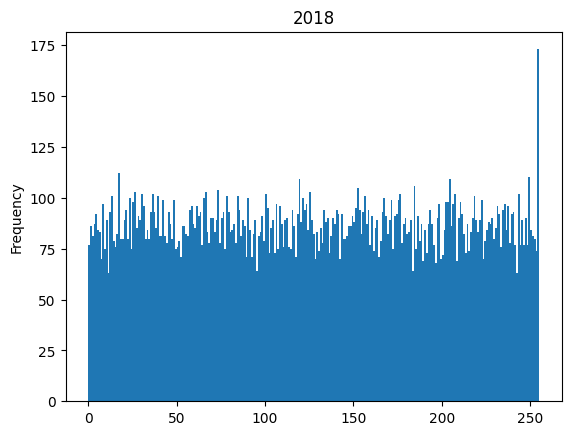

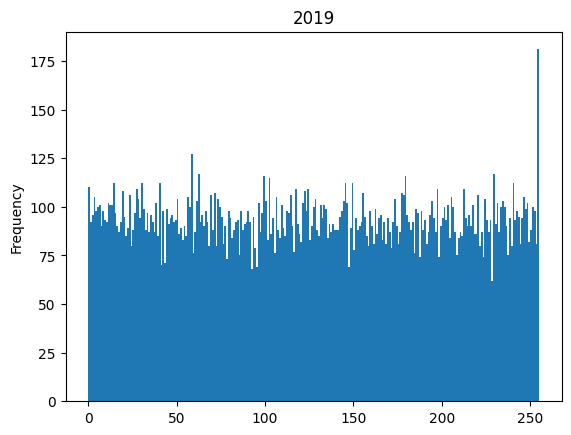

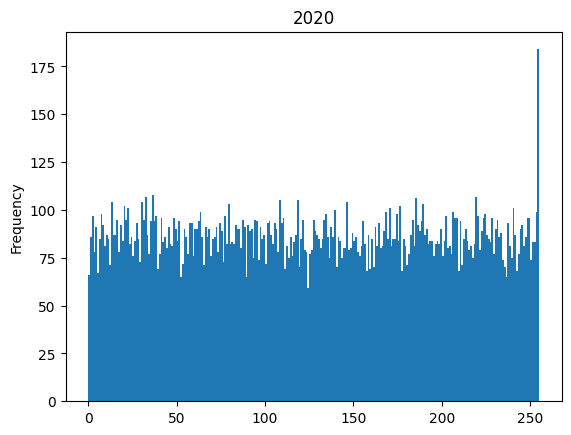

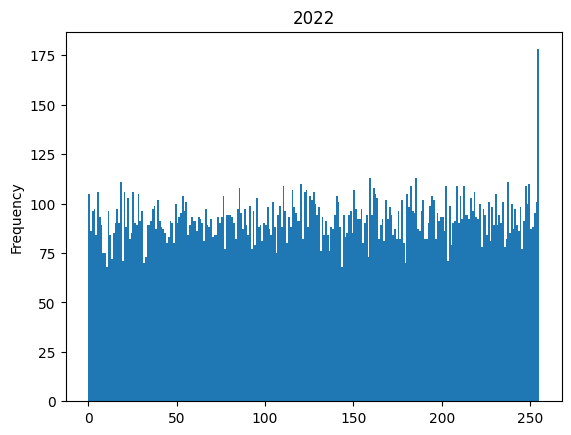

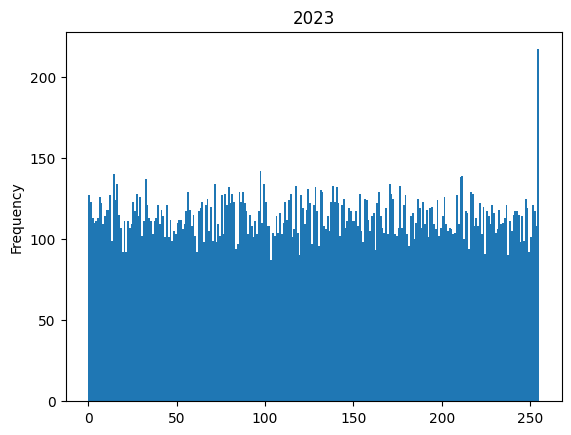

In [ ]:
for year in df['year'].unique():
   df.loc[df['year'] == year, 'reg_delta'].plot(kind='hist', bins=255)
   plt.title(year)
   plt.show()

Итак, большое количество участников регистрируются в последний день регистрации, такие значения можно считать аномальными.  
Также видно что-то, что может походить на последовательность. Однако в отрыве от месяцев трудно понять, шум это или действительно последовательность. Посмотрим на гистограммы с привязкой к месяцам.

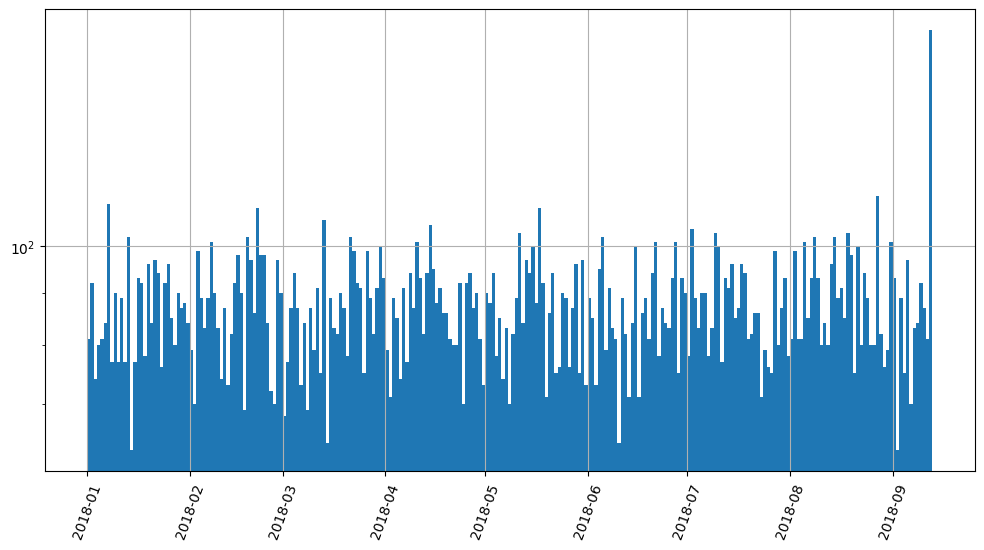

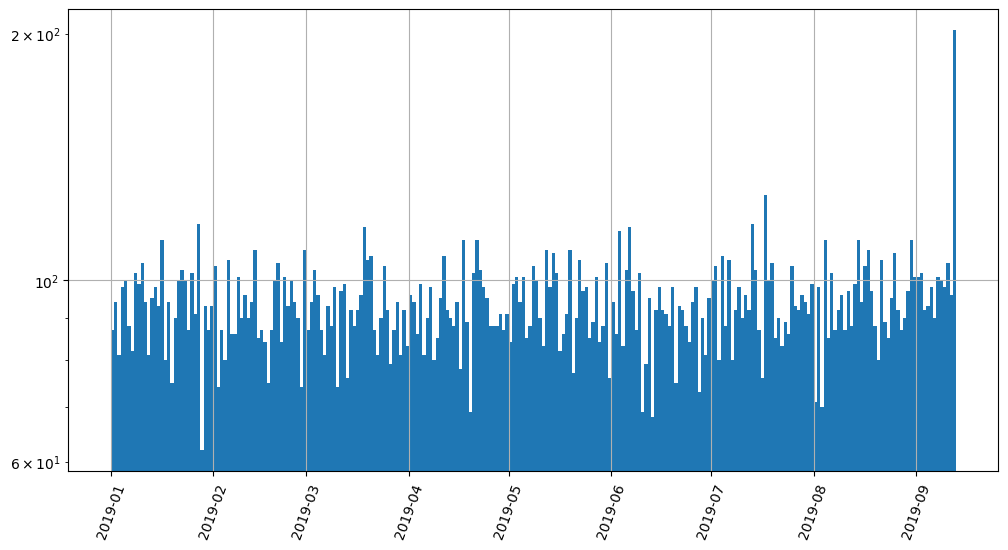

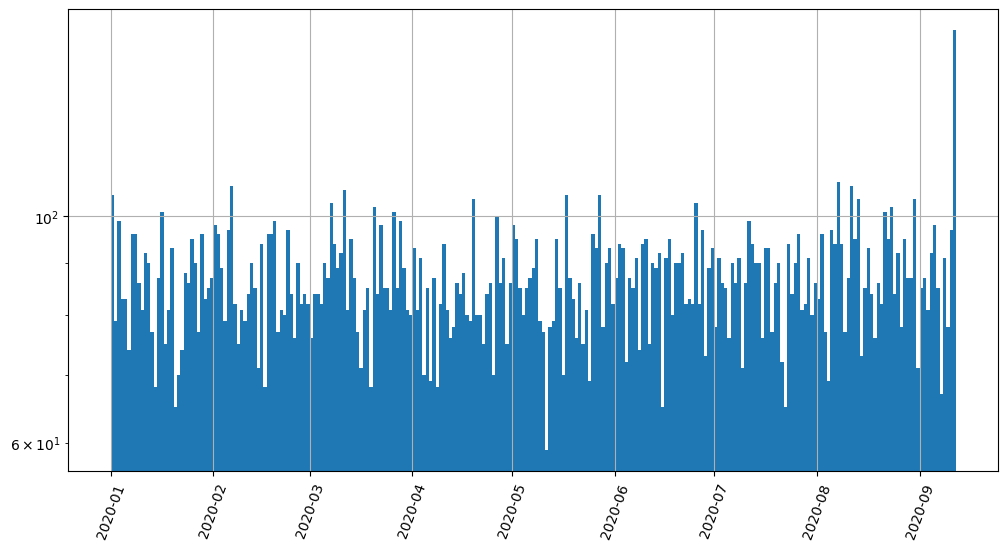

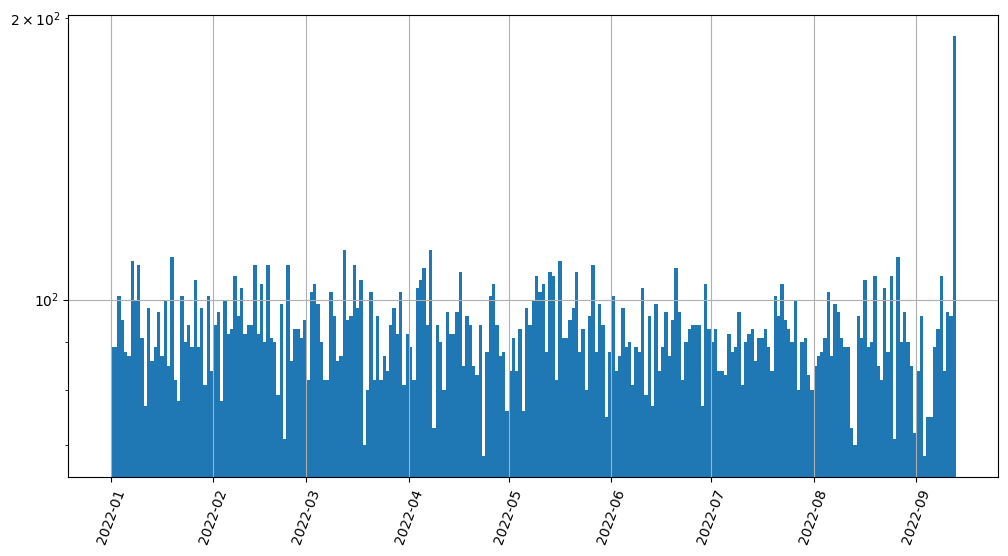

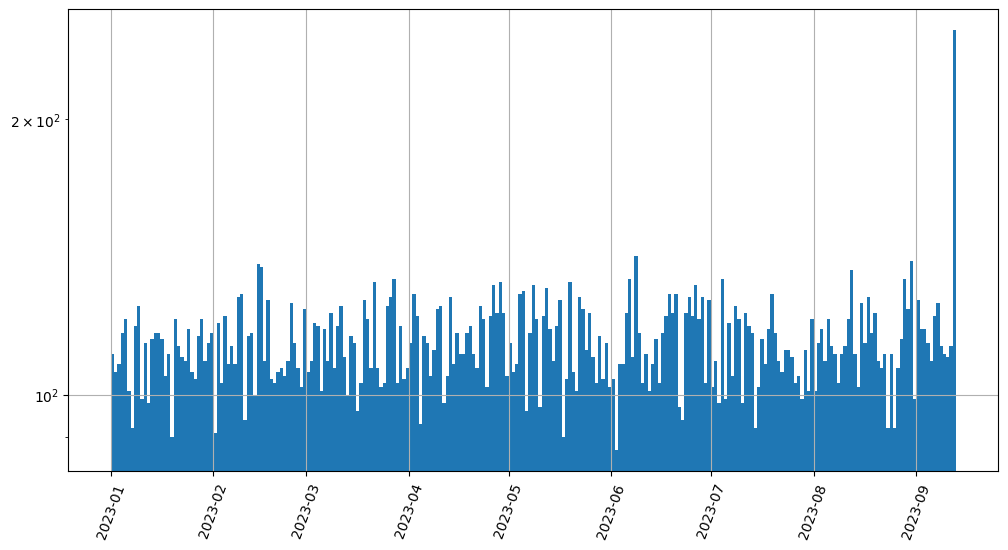

In [ ]:
for year in df['year'].unique():
  plt.figure(figsize=(12,6))
  df.loc[df['year'] == year, 'reg_date'].hist(bins=255, log=True)
  plt.xticks(rotation=70)
  plt.show()

Гистограммы с привязкой к месяцам также не подтвердили конкретную закономерность.  
Теперь, для каждого года проверим гистограмму регистраций на каждый день недели. Примечание: иксы идут от 0 (ПН) до 6 (ВС).

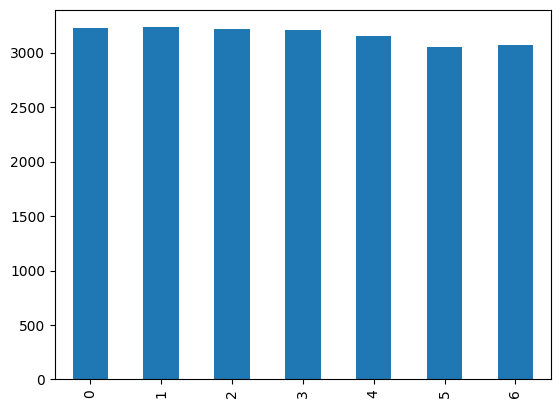

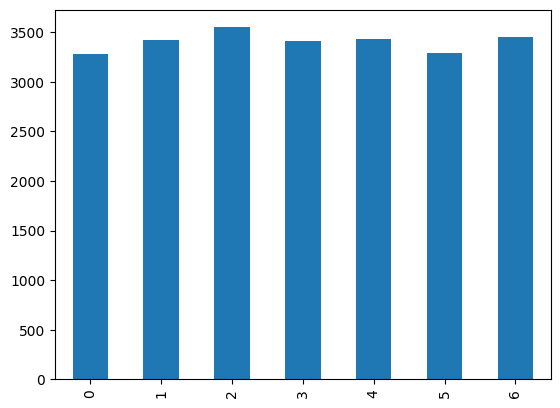

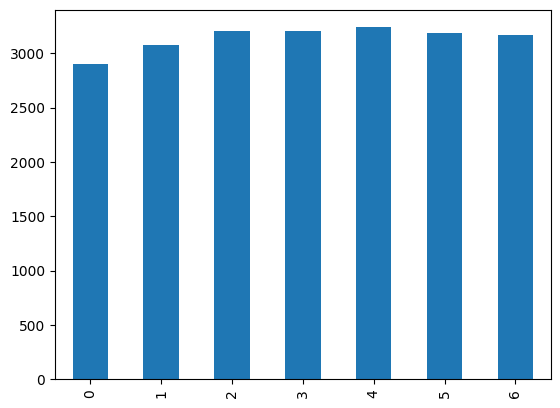

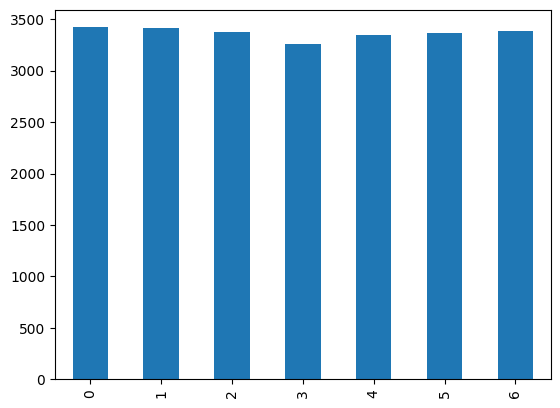

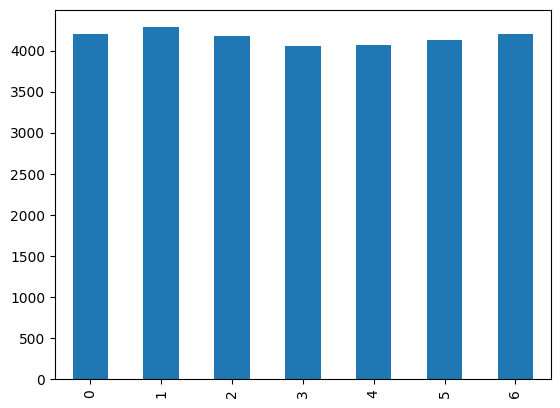

In [ ]:
for year in df['year'].unique():
  df.loc[df['year'] == year]['reg_date'].dt.day_of_week.value_counts().sort_index().plot(kind='bar')
  plt.show()

Частота регистраций также не зависит от дня недели. Похоже, что закономерности никакой нет, это просто шум.  
Итак, мы определили, что последний день регистрации на марафон является аномальным, пометим эти наблюдения.

In [ ]:
df['is_anm_reg'] = df['reg_date'].isin(df.groupby('year')['reg_date'].max())
df['is_anm_reg'].value_counts()

False    120196
True        485
Name: is_anm_reg, dtype: int64

Внизу тот же самый график, что и раньше, только по переменной `pace`.

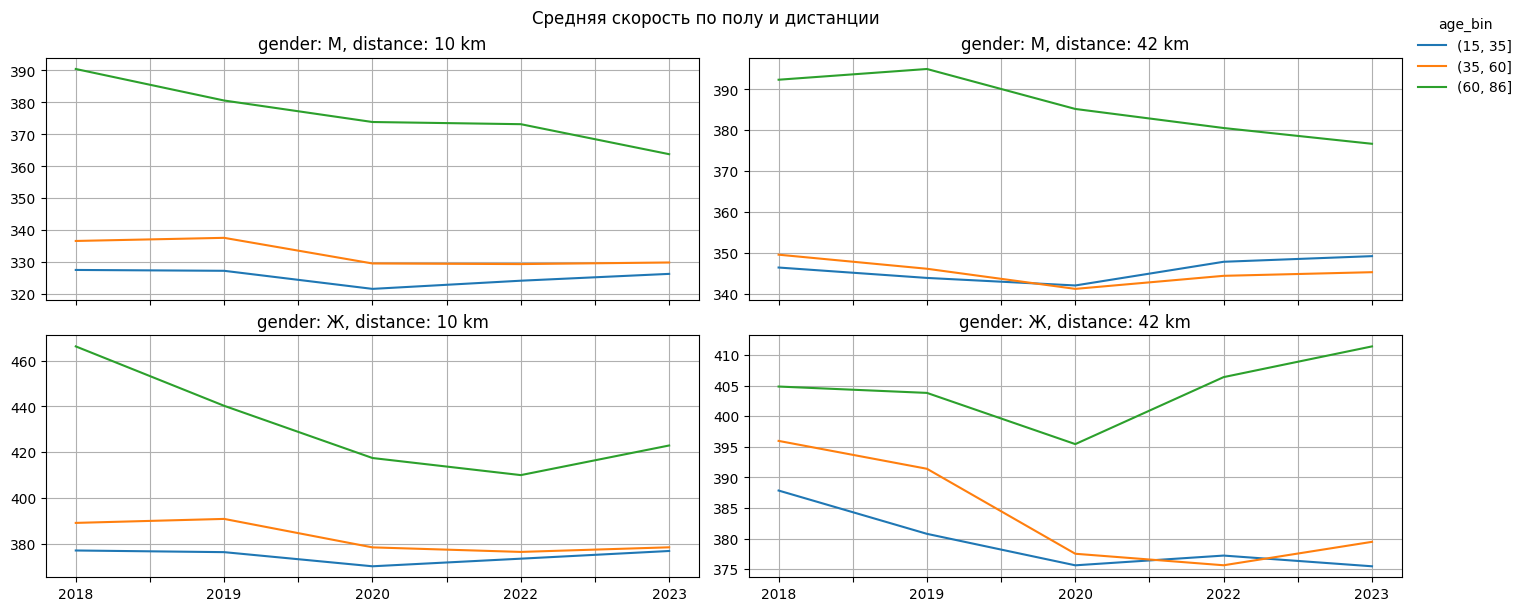

In [ ]:
out = df.groupby(['gender', 'distance', 'year', 'age_bin'])['pace'].mean().unstack(level=[0,1,3])

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14, 6), layout="constrained")

for row, gender in enumerate(df['gender'].unique()):
  for column, distance in enumerate(df['distance'].unique()):
    ax = axs[row, column]
    out[gender][distance].plot(ax=ax, xlabel='', title=f'gender: {gender}, distance: {distance} km')
    ax.grid()
    if row == 0 and column == 0:
      handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()


fig.legend(handles, labels, bbox_to_anchor=(1,1), loc='upper left', frameon=False, title='age_bin')
plt.suptitle('Средняя скорость по полу и дистанции');

Как мы видим, на всех дистанциях, для всех полов, результат улучшился в год пандемии. Значит, мы опровергаем гипотезу.

### Задание №8: Разбейте участников по возрасту на 10 групп (равных по количеству) и ответьте на вопросы.
    
1. Начиная с какой возрастной группы средний результат участников начинает ухудшаться?
2. В какой из возрастных групп наибольшая доля участников, которые не финишируют?
3. Как меняется доля женщин по каждой из возрастных групп? Визуализируйте данные


In [ ]:
df['age_bin'] = pd.qcut(df['age'], 10)
df = df.reset_index(drop=True)
df['age_bin'].value_counts()

(15.999, 26.0]    13717
(33.0, 35.0]      12997
(31.0, 33.0]      12422
(26.0, 29.0]      12388
(35.0, 37.0]      12209
(42.0, 47.0]      11924
(47.0, 86.0]      11895
(39.0, 42.0]      11716
(29.0, 31.0]      11122
(37.0, 39.0]      10291
Name: age_bin, dtype: int64

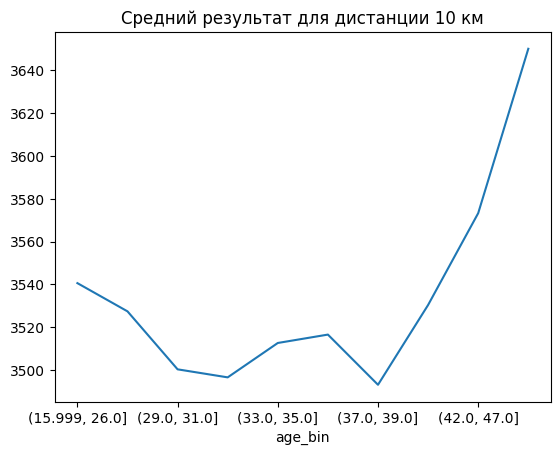

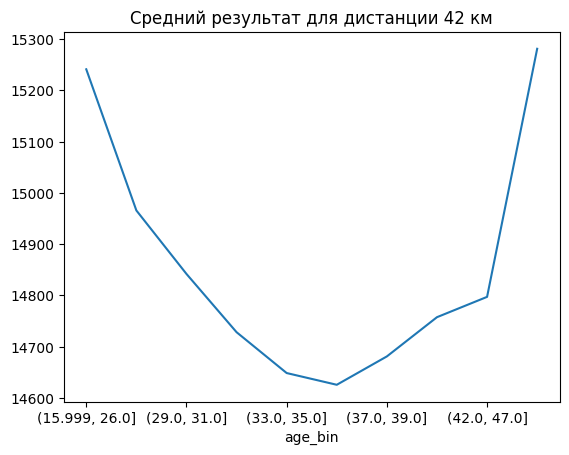

In [ ]:
for distance in df['distance'].unique():
  df[df['distance'] == distance].groupby('age_bin')['result'].mean().plot(title=f'Средний результат для дистанции {distance} км')
  plt.show()

Графики выше не дали нам однозначного ответа. Тем не менее, сравнивать результат в отрыве от дистанции не совсем корректно, потому что, например, пожилые люди участвуют чаще в марафонах на 10 км, что значит, что их результат будет занижен.  

Чтобы принять решение, посмотрим на переменную `pace`. Исходя из прошлых графиков мы знаем, что скорость людей на дистанции 42 км ниже. Это означает, что эффект, описанный выше, все равно будет присутствовать, однако сила этого эффекта будет намного ниже для переменной `pace`.

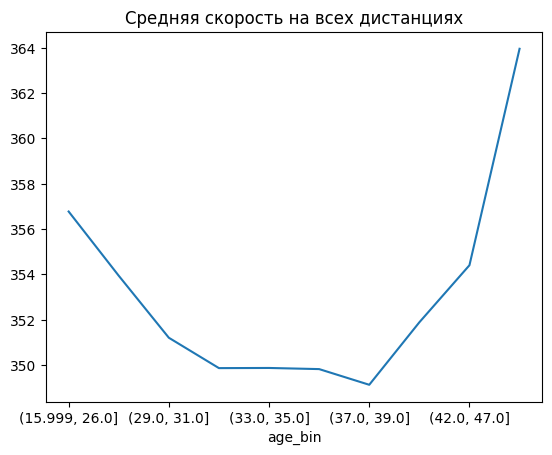

In [ ]:
df.groupby('age_bin')['pace'].mean().plot()
plt.title('Средняя скорость на всех дистанциях');

Итак, результат в марафоне будет ухудшаться после 39 лет.

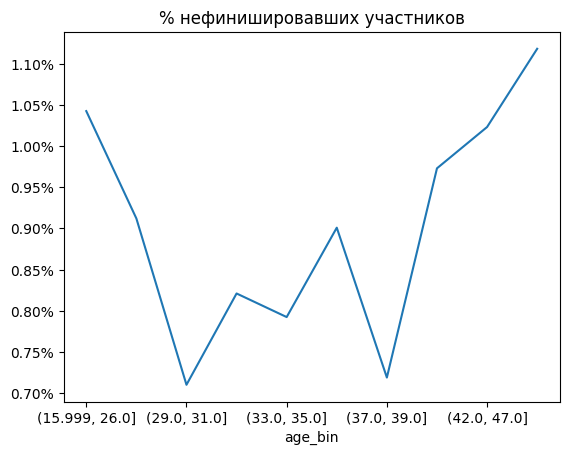

In [ ]:
ax = (1 - df.groupby('age_bin')['finished'].mean()).plot()
ax.yaxis.set_major_formatter('{x:.2%}')
plt.title('% нефинишировавших участников');

Наибольшая доля нефинишировавших участников - от 47 лет.  

Далее, посмотрим на эти доли в зависимости от гендера.

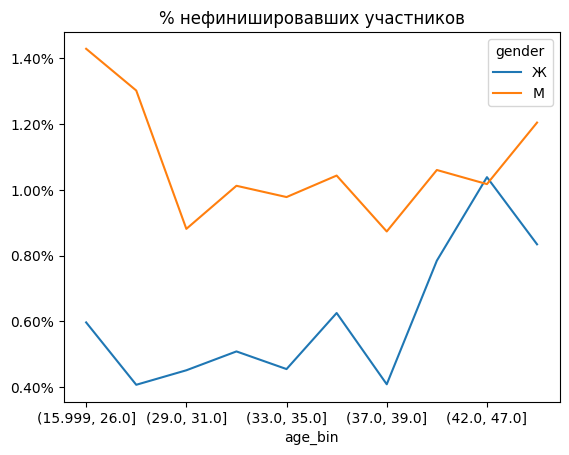

In [ ]:
out = df.groupby(['age_bin', 'gender'])['finished'].mean().unstack(1)
ax = out.apply(lambda x: 1 - x).plot()
ax.yaxis.set_major_formatter('{x:.2%}')
plt.title('% нефинишировавших участников');

### Задание №9: Разбейте участников по возрасту на 10 групп (равных по количеству) и ответьте на вопросы.
    
1. Проанализируйте распределение участников по месту рождения (по каждой группе, по мужчинам, по женщинам). Какие выводы можно сделать?
2. Определите долю аномальных результатов участников в каждой из групп. В какой из групп доля аномальных результатов участников наибольшая?



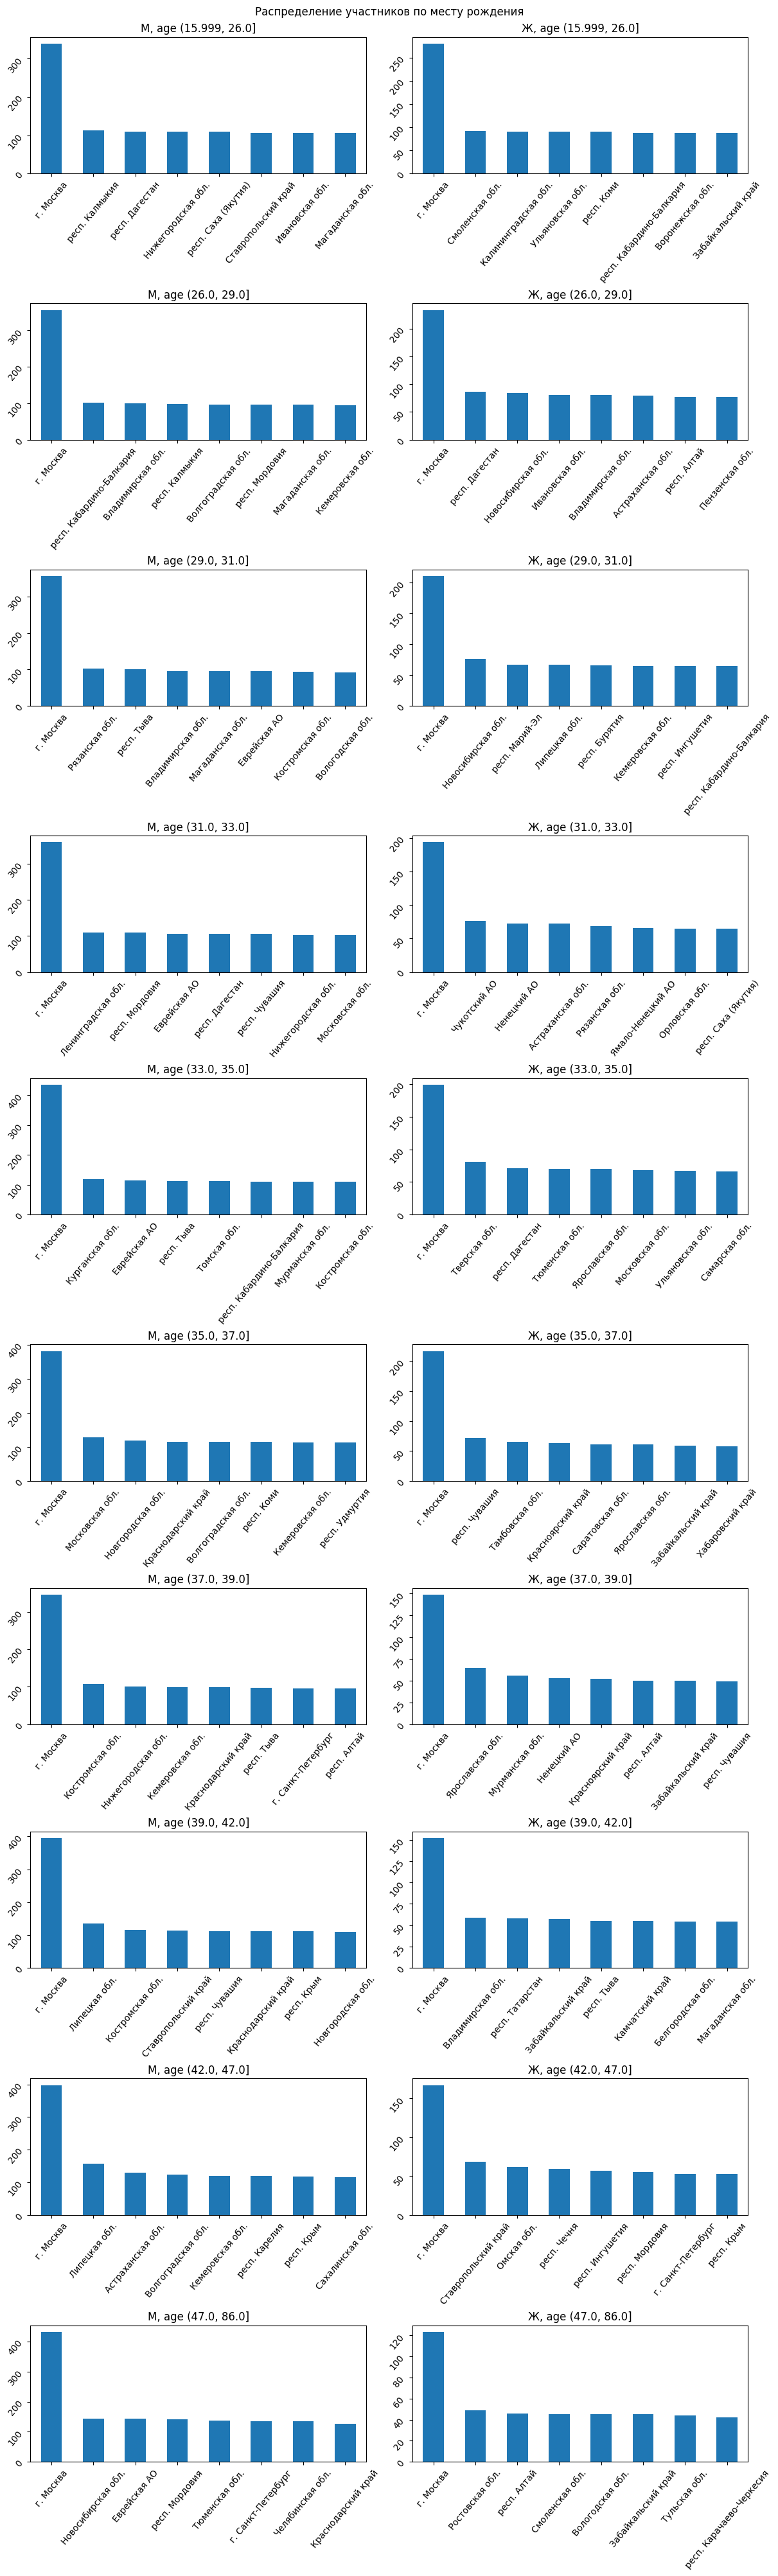

In [ ]:
fig, axs = plt.subplots(10, 2, figsize=(2*6, 10*4), layout='constrained')

for row, age in enumerate(df['age_bin'].unique().sort_values()):
  for column, gender in enumerate(df['gender'].unique()):
    ax = axs[row, column]
    df.loc[(df['gender'] == gender) & (df['age_bin'] == age), 'birth_place'].value_counts()[:8].plot(
        kind='bar', ax=ax, title=f'{gender}, age {str(age)}')
    ax.tick_params(labelrotation=50)

plt.suptitle('Распределение участников по месту рождения')
plt.show();

Как мы видим, все рассмотренные группы в основном из Москвы. Остальные группы более-мерно равномерно распределены, и каких-то существенных различий найти нельзя.

<Axes: >

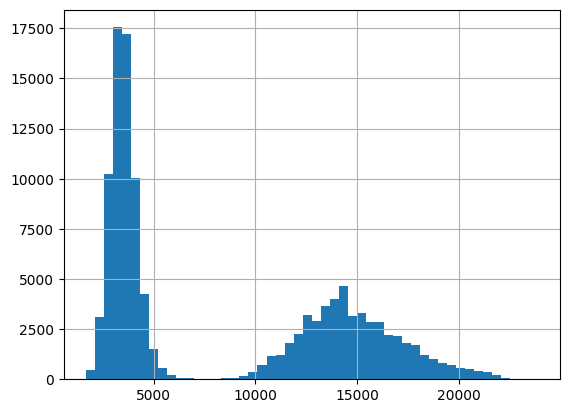

In [ ]:
df['result'].hist(bins=50)
plt.title('Распределение результатов');

В гистограмме явно присутствует два распределения, которые относятся к разным дистанциям.

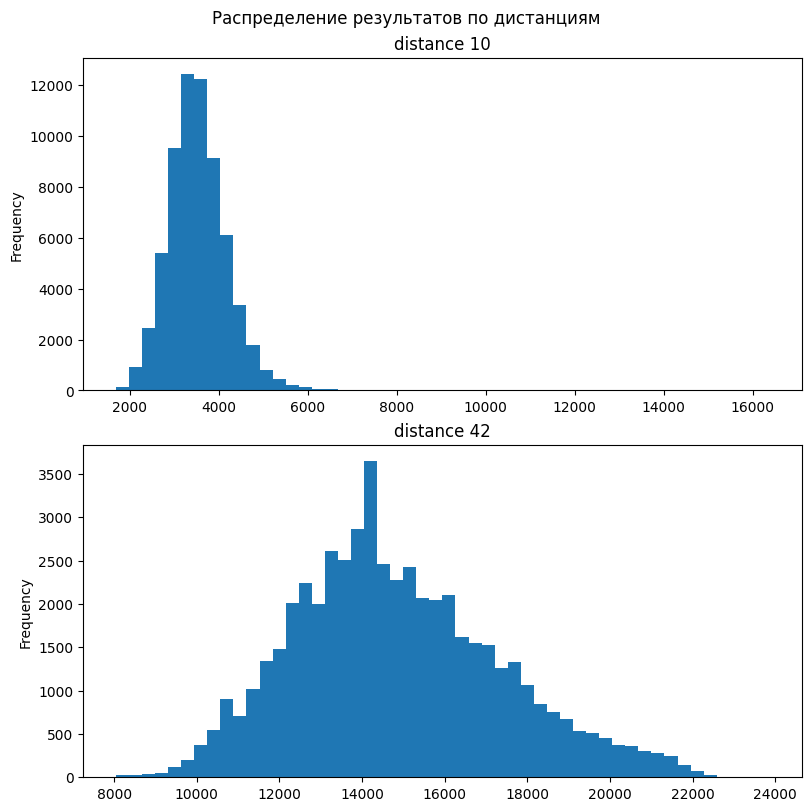

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), layout='constrained')


for column, distance in enumerate(df['distance'].unique()):
  df.loc[df['distance'] == distance, 'result'].plot(kind='hist', bins=50, ax=axs[column])
  axs[column].set_title(f'distance {distance}')


plt.suptitle('Распределение результатов по дистанциям');

Воспользуемся стандартным статистическим критерием для отбора аномальных результатов: если результат лежит вне 3 сигм от среднего, то он считается аномалией. Отметим соответствующий диапозон.

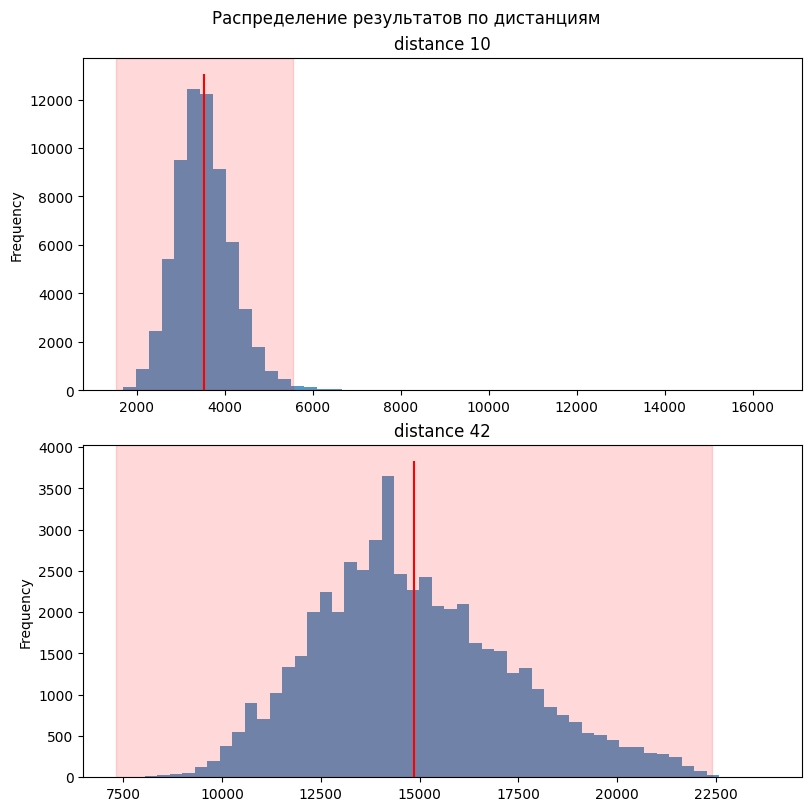

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), layout='constrained')


for column, distance in enumerate(df['distance'].unique()):
  srs = df.loc[df['distance'] == distance, 'result']
  srs.plot(kind='hist', bins=50, ax=axs[column], alpha=.75)
  axs[column].set_title(f'distance {distance}')

  ymin, ymax = axs[column].get_ylim()
  axs[column].vlines(srs.mean(), ymin, ymax, color='red')
  axs[column].axvspan(srs.mean() - 3*srs.std(), srs.mean() + 3*srs.std(), alpha=.15, color='red')


plt.suptitle('Распределение результатов по дистанциям');

Особенно много аномалий на дистанции 10 км. Отметим их в датафрейме.

In [ ]:
for distance in df['distance'].unique():
  srs = df.loc[df['distance'] == distance, 'result']
  df.loc[df['distance'] == distance, 'is_anm_res'] = np.where((srs < srs.mean() - 3*srs.std()) | (srs > srs.mean() + 3*srs.std()), 1, 0)


df['is_anm_res'].value_counts()

0.00    120143
1.00       538
Name: is_anm_res, dtype: int64

### Задание №10: Для каждого возраста и пола определите долю аномальных результатов участников.

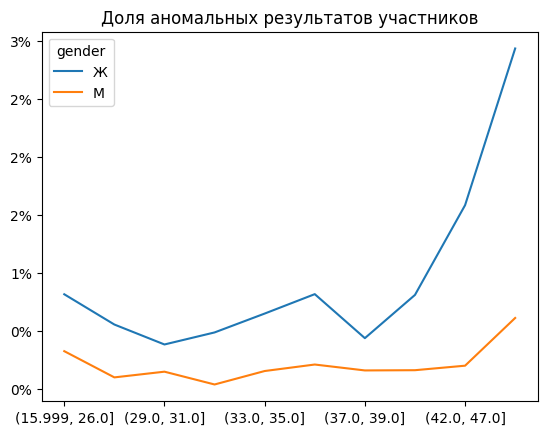

In [ ]:
ax = df.groupby(['age_bin', 'gender'])['is_anm_res'].mean().unstack(1).plot()

ax.yaxis.set_major_formatter('{x:.0%}')

plt.title('Доля аномальных результатов участников')
plt.xlabel('')
plt.legend(title='gender');

Как мы видим, более пожилые люди часто имеют аномальные результаты. Если посмотреть на предыдущие гистограммы, станет понятно, что аномальный результат по сути означает, что людям понадобилось намного больше времени чтобы достичь финиша.

### Задание №11: Для каждой дистации/год выделите список участников-призеров среди мужчин и женщин, которые являются непримеримыми соперниками. Обоснуйте свои выводы.


Чтобы определить потенциальных соперников нам нужен список людей, которые участвуют часто и соревнуются за топ места. Ниже таблица людей, которые участвовали как минимум в 3 соревнованиях со средним местом (на соревнованиях) ниже 30.

In [ ]:
out = df.groupby('name').agg({'place' : ['sum', 'mean', 'count']})
out.columns = out.columns.droplevel()

out = out[(out['count'] > 2) & (out['mean'] <= 30)]
out.sort_values(by='mean')

,sum,mean,count
name,,,
Киселёв Степан,5.00,1.67,3
Неделин Дмитрий,8.00,2.67,3
Трошкин Алексей,10.00,3.33,3
Ядгаров Искандер,15.00,3.75,4
Адышкин Павел,13.00,4.33,3
Клопцов Юрий,14.00,4.67,3
Кульков Михаил,23.00,5.75,4
Котенев Никита,18.00,6.00,3
Миншин Илдар,19.00,6.33,3


Можно было бы остановиться на этом, сказать, что это непримеримые соперники, так как они борются за топ места и часто участвуют в марафонах. Однако, если они участвуют в разные года, то назвать их соперниками сложно. Поэтому, нужно посмотреть как часто они участвуют вместе.  
Чтобы понять, как часто эти люди соперничают, воспользуемся `crosstab`.

In [ ]:
out = df.loc[df['name'].isin(out.index), ['name', 'year']]
out = pd.crosstab(out['year'], df['name'])
out

name,Адышкин Павел,Аплачкин Артем,Григорьев Олег,Дмитриева Луиза,Киселёв Степан,Клопцов Юрий,Коробкина Елена,Котенев Никита,Кульков Михаил,Ликсаков Максим,Лойко Андрей,Миншин Илдар,Неделин Дмитрий,Овчинников Владимир,Пермитин Василий,Сторожев Александр,Трошкин Алексей,Хорошилов Руслан,Худеев Илларион,Ядгаров Искандер
year,,,,,,,,,,,,,,,,,,,,
2018,1,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,0,1
2019,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1
2020,1,1,0,0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,1,1
2022,1,0,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1
2023,0,0,0,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0


Выше мы получили таблицу, где колонка - конкретный человек, индекс - год соревнования, значение - факт участия.  

Ниже мы попарно сравниваем всех участников. Если мы видим более 3 участий в одном и том же соревновании, мы считаем этих людей соперниками.

In [ ]:
opps = []

for lead in range(len(out.columns) - 1):
  for follow in range(lead + 1, len(out.columns)):
    if (out.iloc[:, lead] & out.iloc[:, follow]).sum() > 3:
      opps.append((lead, follow))


opps

[(8, 19), (15, 18)]

In [ ]:
print(*[(out.columns[one].replace('\xa0', ' '), out.columns[two].replace('\xa0', ' ')) for one, two in opps], sep='\n')

('Кульков Михаил', 'Ядгаров Искандер')
('Сторожев Александр', 'Худеев Илларион')


Постротрим на другой вариант, где, чтобы считаться соперниками, график участий участников должен в точности совпадать.

In [ ]:
opps = []

for lead in range(len(out.columns) - 1):
  for follow in range(lead + 1, len(out.columns)):
    if out.iloc[:, lead].equals(out.iloc[:, follow]):
      opps.append((lead, follow))


opps

[(0, 13), (1, 10), (3, 11), (4, 17), (5, 9), (7, 16), (8, 19), (15, 18)]

In [ ]:
print(*[(out.columns[one].replace('\xa0', ' '), out.columns[two].replace('\xa0', ' ')) for one, two in opps], sep='\n')

('Адышкин Павел', 'Овчинников Владимир')
('Аплачкин Артем', 'Лойко Андрей')
('Дмитриева Луиза', 'Миншин Илдар')
('Киселёв Степан', 'Хорошилов Руслан')
('Клопцов Юрий', 'Ликсаков Максим')
('Котенев Никита', 'Трошкин Алексей')
('Кульков Михаил', 'Ядгаров Искандер')
('Сторожев Александр', 'Худеев Илларион')
